In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

In [37]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)
Re    = np.empty([Nsubhalos]) # "True" Eintein radius
Reff  = np.empty([Nsubhalos]) # Effective radius
Tmass = np.empty([Nsubhalos]) # log10 "True" total mass

In [38]:
for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
            dyLens_shear = json.load(f)
            f.close()

    Re[i]    = dyLens_shear["Reff"]
    Reff[i]  = dyLens_shear["MthetaE"]
    Tmass[i] = dyLens_shear["Mtotal"]

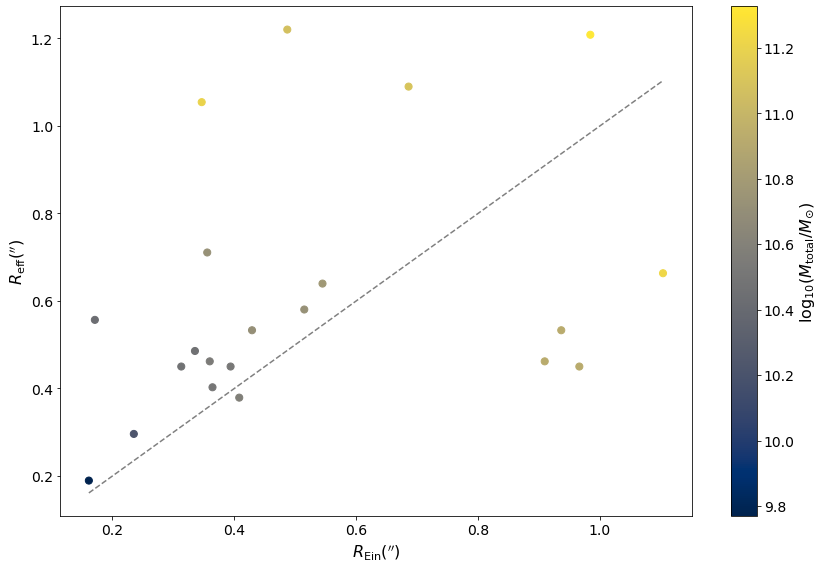

In [73]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

# Criar a figura com subplots
fig = plt.figure(figsize=(12, 8))

plt.scatter(x=Re, y=Reff, s=50, c=Tmass, cmap="cividis")

cbar = plt.colorbar()
cbar.set_label(r"${\log_{10}(M_{\rm total}/M_{\odot})}$", fontsize=16) 


plt.ylabel(r"$R_{\rm eff} ('')$",  size=16)
plt.xlabel(r"$R_{\rm Ein} ('')$",  size=16)

r = np.linspace(Re.min(), Re.max())
plt.plot(r, r, color="gray", linestyle="--")

plt.tight_layout()


----